In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scenario
I am a junior data analyst working for a hospital. I have been at my job for six months and my manager feels I am ready for more responsibilty.

I will
1. _explore patient data, clean or fix if necessary_
2. _create visuals_
3. _prepare a summary of my analysis_

In [ ]:
df = pd.read_csv('medical_cost.csv')
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
if (df.isna().sum().sum() != 0):
  print(df.isna())
else:
  print("No nan values in the dataset.")

No nan values in the dataset.


In [ ]:
df.describe

<bound method NDFrame.describe of         Id  age     sex     bmi  children smoker     region      charges
0        1   19  female  27.900         0    yes  southwest  16884.92400
1        2   18    male  33.770         1     no  southeast   1725.55230
2        3   28    male  33.000         3     no  southeast   4449.46200
3        4   33    male  22.705         0     no  northwest  21984.47061
4        5   32    male  28.880         0     no  northwest   3866.85520
...    ...  ...     ...     ...       ...    ...        ...          ...
1333  1334   50    male  30.970         3     no  northwest  10600.54830
1334  1335   18  female  31.920         0     no  northeast   2205.98080
1335  1336   18  female  36.850         0     no  southeast   1629.83350
1336  1337   21  female  25.800         0     no  southwest   2007.94500
1337  1338   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 8 columns]>

In [ ]:
df.shape

(1338, 8)

In [ ]:
df['Id'].value_counts()

1       1
899     1
897     1
896     1
895     1
       ..
446     1
445     1
444     1
443     1
1338    1
Name: Id, Length: 1338, dtype: int64

* As we see the the lenght in the output, it is equal to dataset's number of rows. So we do not have any duvlicated Id's.
Our data is clean, It does not need any cleaning process.

In [ ]:
df.corr(numeric_only=True).loc[["age","bmi","children", "charges"]]

,Id,age,bmi,children,charges
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


* Based on the correlation matrix, there is no 'strong' relationship between two features, charges-age has ~0.3 correlation but it is not that strong.

# Viz

### which regions has the most number of smokers

In [ ]:
smokers_grouped = df.groupby(['smoker', 'region']).size()
print(smokers_grouped.loc['yes'])

region
northeast    67
northwest    58
southeast    91
southwest    58
dtype: int64


* we clearly see, southeast has most smoker patients, 91.
* southwest and northwest has least number of smokers.
  - we can say, people may smoke less in the west regions. I will dig deeper into it, I need to check the total number of patients from regions.

In [ ]:
print(smokers_grouped.loc['no'])

region
northeast    257
northwest    267
southeast    273
southwest    267
dtype: int64


* southeast also has the most number of patients, it means the data has more of southeast people, so it is expected to have bigger number of smokers.
  - So we can not say something about the most smoker population, but we can check the smoker and non-smoker percentage of the patients. That plan will give us healthier information.

In [ ]:
regions = set(region for _, region in smokers_grouped.keys())

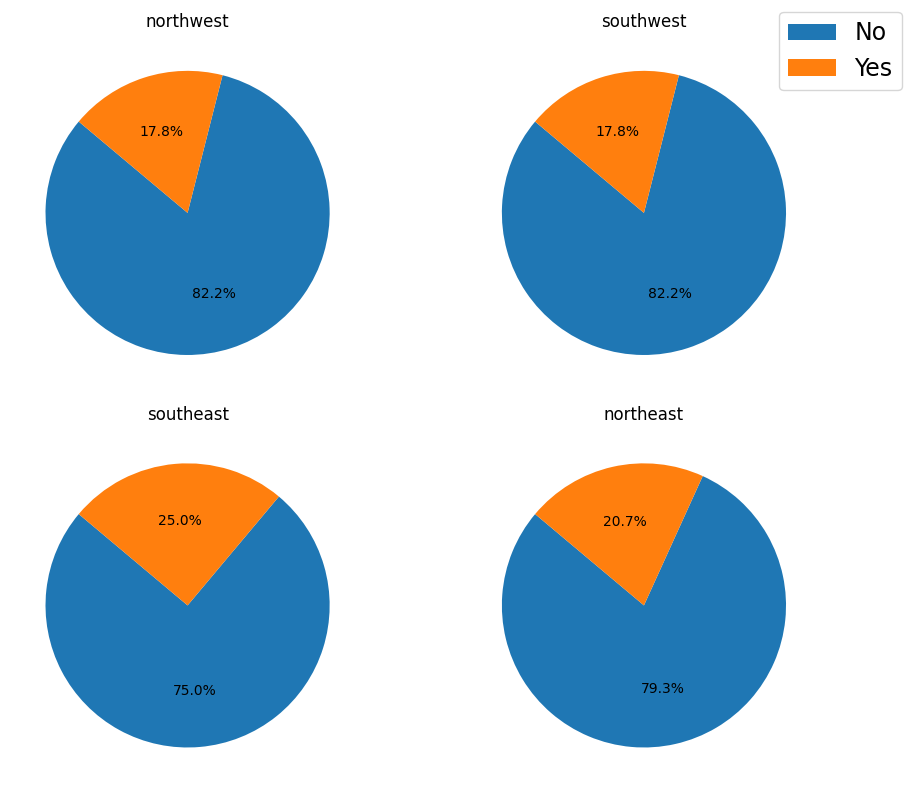

In [ ]:
i = 1
fig = plt.figure(figsize=(10, 8))

for region in regions:
  count_no = smokers_grouped[('no', region)]
  count_yes = smokers_grouped[('yes', region)]

  full_data = [count_no, count_yes]
  labels = ['No', 'Yes']

  ax = fig.add_subplot(2, 2, i)
  ax.pie(full_data, autopct='%1.1f%%', startangle=140)

  ax.set_title(region)
  i += 1

fig.legend(labels, loc='upper right', prop={'size': 17})
fig.tight_layout()
fig.show()

- With that pie charts, we can have an opinion about the percentage of the patients who are smokers. Southeast has the most number of smoker patients, northwest and southwest has the same number of smokers and non smokers.

### patient genders on regions

In [ ]:
grouped_sex = df.groupby(['region', 'sex']).size().reset_index(name='count')
male_region = grouped_sex[grouped_sex['sex'] == 'male']
female_region = grouped_sex[grouped_sex['sex'] == 'female']

In [ ]:
male_region

,region,sex,count
1,northeast,male,163
3,northwest,male,161
5,southeast,male,189
7,southwest,male,163


In [ ]:
female_region

,region,sex,count
0,northeast,female,161
2,northwest,female,164
4,southeast,female,175
6,southwest,female,162


In [ ]:
male_counts_by_region = male_region.groupby('region')['count'].sum()
female_counts_by_region = female_region.groupby('region')['count'].sum()

In [ ]:
genders = pd.DataFrame({'# of Male': male_counts_by_region, '# of Female':female_counts_by_region})

In [ ]:
genders

,# of Male,# of Female
region,,
northeast,163,161
northwest,161,164
southeast,189,175
southwest,163,162


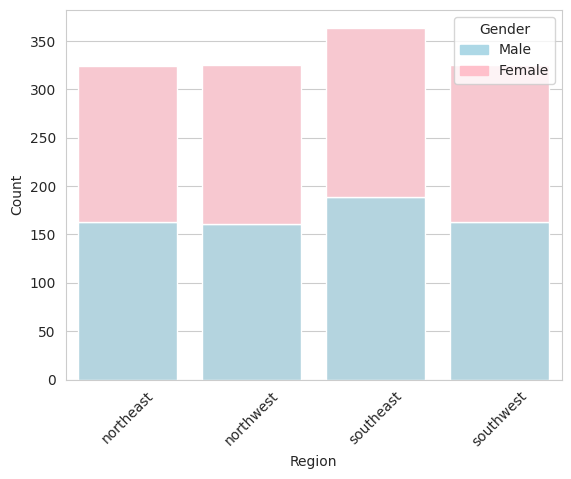

In [ ]:
width = 0.35
x = range(len(genders.index))

sns.set_style("whitegrid")

fig, ax = plt.subplots()

ax = sns.barplot(data=genders, x=genders.index, y='# of Male', color='lightblue', label='Male')
ax = sns.barplot(data=genders, x=genders.index, y='# of Female', color='pink', bottom=genders['# of Male'])

ax.set_xlabel('Region')
ax.set_ylabel('Count')

legend_labels = ['Male', 'Female']
legend_colors = ['lightblue', 'pink']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
ax.legend(legend_handles, legend_labels, title='Gender')

plt.xticks(rotation=45)
plt.show()

### highest bmi

In [ ]:
highest_bmi_20 = df.sort_values(by='bmi', ascending=False).head(20)
lowest_bmi_20 = df.sort_values(by='bmi', ascending=False).tail(20)

In [ ]:
highest_bmi_20

,Id,age,sex,bmi,children,smoker,region,charges
1317,1318,18,male,53.13,0,no,southeast,1163.46270
1047,1048,22,male,52.58,1,yes,southeast,44501.39820
847,848,23,male,50.38,1,no,southeast,2438.05520
116,117,58,male,49.06,0,no,southeast,11381.32540
286,287,46,female,48.07,2,no,northeast,9432.92530
1088,1089,52,male,47.74,1,no,southeast,9748.91060
860,861,37,female,47.60,2,yes,southwest,46113.51100
401,402,47,male,47.52,1,no,southeast,8083.91980
543,544,54,female,47.41,0,yes,southeast,63770.42801
438,439,52,female,46.75,5,no,southeast,12592.53450


In [ ]:
lowest_bmi_20

,Id,age,sex,bmi,children,smoker,region,charges
950,951,57,male,18.335,0,no,northeast,11534.87265
1133,1134,52,female,18.335,0,no,northwest,9991.03765
1074,1075,60,female,18.335,0,no,northeast,13204.28565
1085,1086,39,female,18.300,5,yes,southwest,19023.26000
198,199,51,female,18.050,0,no,northwest,9644.25250
380,381,27,female,17.955,2,yes,northeast,15006.57945
1205,1206,35,male,17.860,1,no,northwest,5116.50040
232,233,19,female,17.800,0,no,southwest,1727.78500
128,129,32,female,17.765,2,yes,northwest,32734.18630
821,822,26,male,17.670,0,no,northwest,2680.94930


In [ ]:
len(highest_bmi_20[highest_bmi_20['sex'] == 'male']), len(highest_bmi_20[highest_bmi_20['sex'] == 'female'])

(12, 8)

In [ ]:
len(lowest_bmi_20[lowest_bmi_20['sex'] == 'male']), len(lowest_bmi_20[lowest_bmi_20['sex'] == 'female'])

(8, 12)

* there are 12 males and 8 females in the top 10 of highest bmi dataframe
* there are 8 males and 12 females in the top 10 of lowest bmi dataframe

men have higher bmi compared to women.

### who are most paid patients, their average bmi, num of children and states

In [ ]:
charges_sorted = df.sort_values(by='charges').head(10)

age = charges_sorted['age'].mean()
gender = charges_sorted['sex'].value_counts()
children = charges_sorted['children'].mean()
bmi = charges_sorted['bmi'].mean()
smoker = charges_sorted[charges_sorted['smoker'] == 'yes'].value_counts()

In [ ]:
print(f"Top 5 highest charged patients \nMean age: {age}\nMale patients: {gender['male']} \nFemale patients: 0 \nNumber of Children: {children} \nMean BMI: {bmi} \nNumber of smokers: {smoker.item()}")

Top 5 highest charged patients 
Mean age: 18.0
Male patients: 10 
Female patients: 0 
Number of Children: 0.0 
Mean BMI: 36.344 
Number of smokers: 10


* in the top 10 of highest charged patients:
  - all of them are male smokers,
  - none of them has children,
  - their mean bmi is 36, between 30 and 39 in bmi means obesite
  - worstly, average age of that patients is 18.